In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(color_codes=True)

## Load Data

In [3]:
train_data = pd.read_csv("data/train.csv", encoding='utf-8', index_col=False)

In [4]:
train_data.shape

(404290, 6)

In [5]:
train_data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


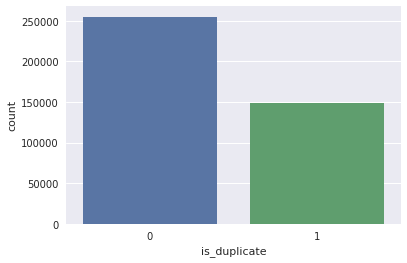

In [6]:
ax = sns.countplot(x="is_duplicate", data=train_data)

In [7]:
test_data = pd.read_csv("data/test.csv", encoding='utf-8', index_col=False)

In [8]:
test_data.shape

(2345796, 3)

In [16]:
test_data.head(5)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


## Train Validation Split

In [10]:
train = train_data.sample(frac=0.7,random_state=200)
validate = train_data.drop(train.index)

In [11]:
train.shape

(283003, 6)

In [12]:
validate.shape

(121287, 6)

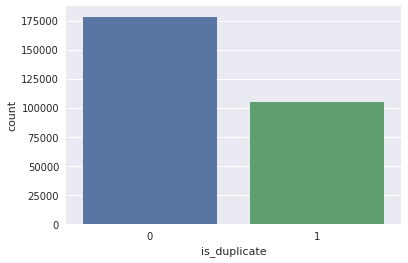

In [13]:
ax = sns.countplot(x="is_duplicate", data=train)

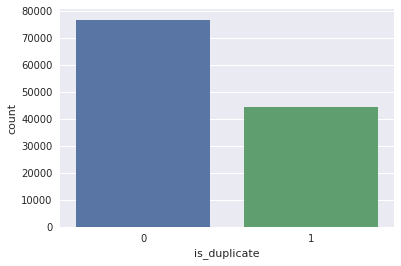

In [15]:
ax = sns.countplot(x="is_duplicate", data=validate)

## Baseline Method (Match words only)

In [16]:
from nltk.tokenize import word_tokenize

In [28]:
new_train = []

In [29]:
for idx, val in train.iterrows():
    q1 = word_tokenize(str(val['question1']).lower())
    q2 = word_tokenize(str(val['question2']).lower())
    match_no = len(list(set(q1).intersection(q2)))
    val['per_avg_length'] = (match_no/((len(q1) + len(q2))/float(2)))
    val['per_big_length'] = (match_no/float(max(len(q1), len(q2))))
    val['per_small_length'] = (match_no/float(min(len(q1), len(q2))))
    
    new_train.append(val)

In [31]:
train = pd.DataFrame(new_train)
train.shape

(283003, 9)

/home/rony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

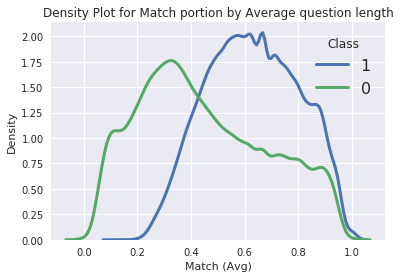

In [33]:
lable_name = [1, 0]
for lbl in lable_name:
    # Subset to the airline
    subset = train[train['is_duplicate'] == lbl]
    
    # Draw the density plot
    sns.distplot(subset['per_avg_length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lbl)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Class')
plt.title('Density Plot for Match portion by Average question length')
plt.xlabel('Match (Avg)')
plt.ylabel('Density')

/home/rony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

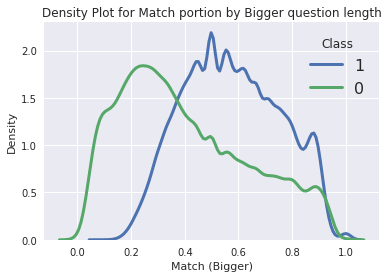

In [34]:
lable_name = [1, 0]
for lbl in lable_name:
    # Subset to the airline
    subset = train[train['is_duplicate'] == lbl]
    
    # Draw the density plot
    sns.distplot(subset['per_big_length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lbl)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Class')
plt.title('Density Plot for Match portion by Bigger question length')
plt.xlabel('Match (Bigger)')
plt.ylabel('Density')

/home/rony/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

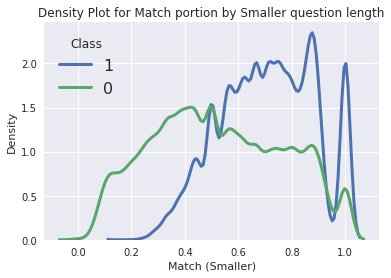

In [35]:
lable_name = [1, 0]
for lbl in lable_name:
    # Subset to the airline
    subset = train[train['is_duplicate'] == lbl]
    
    # Draw the density plot
    sns.distplot(subset['per_small_length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lbl)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Class')
plt.title('Density Plot for Match portion by Smaller question length')
plt.xlabel('Match (Smaller)')
plt.ylabel('Density')

In [36]:
thresholds = [0.35, 0.40, 0.45, 0.5]

In [37]:
new_validate = []
for idx, val in validate.iterrows():
    q1 = word_tokenize(str(val['question1']).lower())
    q2 = word_tokenize(str(val['question2']).lower())
    match_no = len(list(set(q1).intersection(q2)))
    val['per_avg_length'] = (match_no/((len(q1) + len(q2))/float(2)))
    val['per_big_length'] = (match_no/float(max(len(q1), len(q2))))
    val['per_small_length'] = (match_no/float(min(len(q1), len(q2))))
    
    new_validate.append(val)

In [38]:
validate = pd.DataFrame(new_validate)
validate.shape

(121287, 9)

In [43]:
for thr in thresholds:
    avg_correct = 0
    big_correct = 0
    small_correct = 0
    for idx, val in validate.iterrows():
        avg_dec = 0
        big_dec = 0
        small_dec = 0
        if val['per_avg_length'] >= thr:
            avg_dec = 1
        if val['is_duplicate'] == avg_dec:
            avg_correct += 1
        if val['per_big_length'] >= thr:
            big_dec = 1
        if val['is_duplicate'] == big_dec:
            big_correct += 1
        if val['per_small_length'] >= thr:
            small_dec = 1
        if val['is_duplicate'] == small_dec:
            small_correct += 1
    print("For threshold {thrs} accuracy with Average Length is {acc}".format(thrs=thr, acc=avg_correct/float(len(validate))))
    print("For threshold {thrs} accuracy with Bigger Length is {acc}".format(thrs=thr, acc=big_correct/float(len(validate))))
    print("For threshold {thrs} accuracy with Smaller Length is {acc}".format(thrs=thr, acc=small_correct/float(len(validate))))

For threshold 0.35 accuracy with Average Length is 0.6066107661991804
For threshold 0.35 accuracy with Bigger Length is 0.6379579015063445
For threshold 0.35 accuracy with Smaller Length is 0.5331321576096366
For threshold 0.4 accuracy with Average Length is 0.6355256540272247
For threshold 0.4 accuracy with Bigger Length is 0.6556762060237289
For threshold 0.4 accuracy with Smaller Length is 0.5636383124324948
For threshold 0.45 accuracy with Average Length is 0.6586113928120904
For threshold 0.45 accuracy with Bigger Length is 0.6636325409977986
For threshold 0.45 accuracy with Smaller Length is 0.6032056197284128
For threshold 0.5 accuracy with Average Length is 0.666023563943374
For threshold 0.5 accuracy with Bigger Length is 0.6633522141696967
For threshold 0.5 accuracy with Smaller Length is 0.6159769802204688


In [41]:
print('Coordinates: {latitude}, {longitude}'.format(latitude=37.24, longitude=-115.81/2))

Coordinates: 37.24, -57.905


In [44]:
validate.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,per_avg_length,per_big_length,per_small_length
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.857143,0.800000,0.923077
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.384615,0.333333,0.454545
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,0.636364,0.538462,0.777778
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,0.434783,0.384615,0.500000
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1,0.933333,0.875000,1.000000


## Cosine Similarity